For more details about the problems and an introduction to the idea behind the code see: https://glowingpython.blogspot.com/2020/06/solving-travelling-salesman-problem.html

In [1]:
from minisom_gpu.som import MiniSom

import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

device = 'cuda'

In [2]:
np.random.RandomState(10)
N_points = 40
N_neurons = N_points*2
t = np.linspace(0, np.pi*2, N_points)
x = np.cos(t)+(np.random.rand(N_points)-.5)*.3
y = np.sin(t)+(np.random.rand(N_points)-.5)*.3

som = MiniSom(1, N_neurons, 2, sigma=8, learning_rate=.4,
              neighborhood_function='gaussian', random_seed=0, device=device)
points = torch.tensor(np.array([x,y]).T, dtype=torch.float32, device=device)
som.random_weights_init(points)

/work/minisom_gpu/som.py:148: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


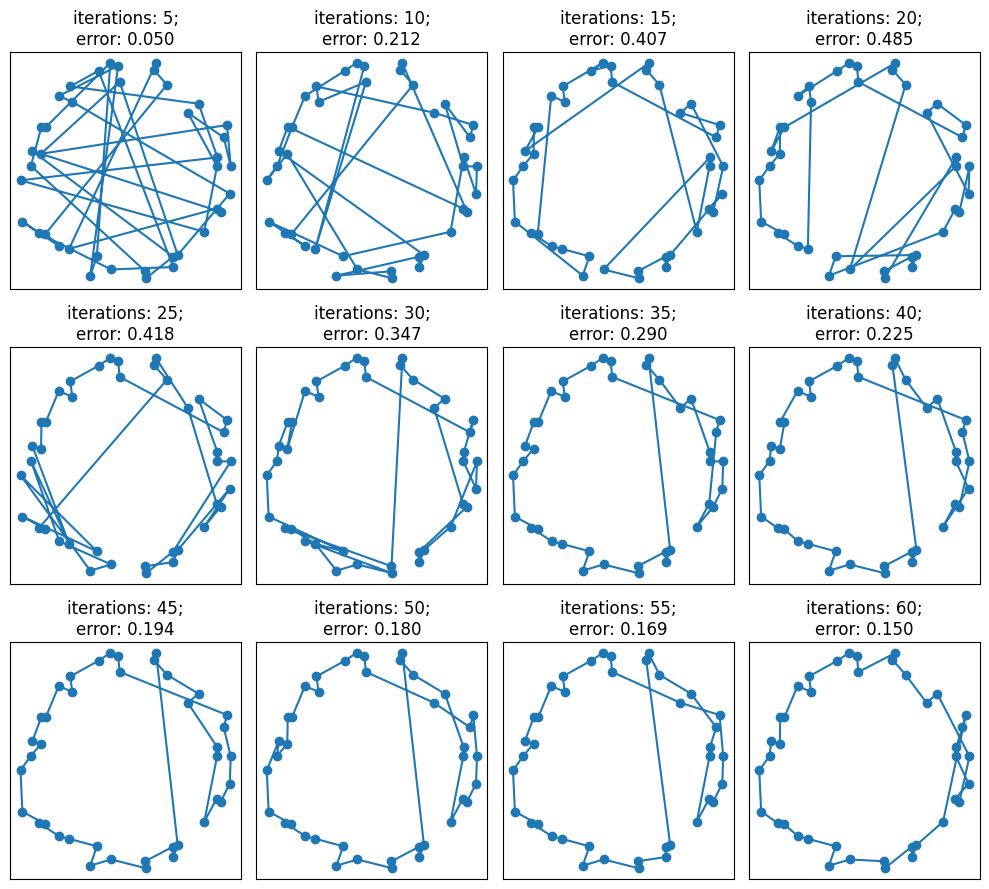

In [3]:
plt.figure(figsize=(10, 9))
for i, iterations in enumerate(range(5, 61, 5)):
    som.train(points, iterations, verbose=False, random_order=False)
    plt.subplot(3, 4, i+1)
    plt.scatter(x,y)
    visit_order = np.argsort([som.winner(p)[1] for p in points])
    visit_order = np.concatenate((visit_order, [visit_order[0]]))
    plt.plot(points[visit_order][:,0].cpu(), points[visit_order][:,1].cpu())
    plt.title("iterations: {i};\nerror: {e:.3f}".format(i=iterations, 
                                                        e=som.quantization_error(points)))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()